In [103]:
require(data.table)
require(dplyr)
require(tidyverse)
require(dada2)
require(phyloseq)
require(genefilter)
require(ggplot2)
require(vegan)
require(RColorBrewer)
require(metacoder)
options(repr.plot.width=20, repr.plot.height=15)
supressWarnings()

Loading required package: dada2

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘dada2’”
Loading required package: genefilter

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘genefilter’”


ERROR: Error in supressWarnings(): could not find function "supressWarnings"


In [104]:
ps<-readRDS(file = "/work/pi_sarah_gignouxwolfsohn_uml_edu/caroline/RDS/ps.rds")

In [105]:
#removing any taxa that don't show up in any samples to speed up the process
ps <- prune_taxa(taxa_sums(ps) > 0, ps)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 93551 taxa and 57 samples ]
sample_data() Sample Data:       [ 57 samples by 95313 sample variables ]
tax_table()   Taxonomy Table:    [ 93551 taxa by 6 taxonomic ranks ]

In [106]:
#normalizing ps by converting rawcounts into relative abundances
#so samples with more reads wont be over represented
#using ps bc only to the count data (OTU table), while preserving the rest of the object
ps_norm = transform_sample_counts(ps, function(x) 1E6 * x / sum(x))
ps_norm

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 93551 taxa and 57 samples ]
sample_data() Sample Data:       [ 57 samples by 95313 sample variables ]
tax_table()   Taxonomy Table:    [ 93551 taxa by 6 taxonomic ranks ]

In [107]:
#isolate just bacteria
ps_norm_bac=subset_taxa(ps_norm, Kingdom=="Bacteria")
ps_norm_bac

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 82630 taxa and 57 samples ]
sample_data() Sample Data:       [ 57 samples by 95313 sample variables ]
tax_table()   Taxonomy Table:    [ 82630 taxa by 6 taxonomic ranks ]

In [108]:
#remove chloroplast order
ps_norm_nochlo=subset_taxa(ps_norm_bac, Order!="Chloroplast")
ps_norm_nochlo

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 60624 taxa and 57 samples ]
sample_data() Sample Data:       [ 57 samples by 95313 sample variables ]
tax_table()   Taxonomy Table:    [ 60624 taxa by 6 taxonomic ranks ]

In [109]:
theme_set(theme_bw())

# using vegan to ordinate

In [110]:
# convert the sample_data() within a phyloseq object to a vegan compatible data object
pssd2veg <- function(ps_norm_nochlo) {
  sd_nochlo <- sample_data(ps_norm_nochlo)
  return(as(sd_nochlo,"data.frame"))
}

#using phyloseq nmds plot no chloroplast
sample_nochlo <- pssd2veg(ps_norm_nochlo)


In [111]:
# convert the otu_table() within a phyloseq object to a vegan compatible data object
psotu2veg <- function(ps_norm_nochlo) {
  otu_nochlo <- otu_table(ps_norm_nochlo)
  if (taxa_are_rows(otu_nochlo)) {
    otu_nochlo <- t(otu_nochlo)
  }
  return(as(otu_nochlo, "matrix"))
}

# Extract normalized OTU matrix and sample data
otu_nochlo <- psotu2veg(ps_norm_nochlo)


In [112]:
head(sample_nochlo)

,Health_Status,colony,Date_16S,X16S.double.band,date,transect,species,TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,ATACGGAGGGGGTTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCGTGTAGGCGGAACGATCAGTCGGAGGTGAAATCCCGGGGCTTAACCCCGGAACTGCCTTCGATACTATCGTTCTAGAGATCGGAAGAGGTGAGTGGAATTCCCAGTGTAGAGGTGGAATTCGTAGATATTGGGAAGAACACCAGAGGCGAAGGCGACTCACTGGTCCGATACTGACGCTCAGACGCGAAAGTGTGGGGAGCAAACAGGA,TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGTAGGCGGCCTTTTAAGTTGGATGTGAAAGCCCCGGGCTTAACCTGGGAACGGCATCCAAAACTGAGAGGCTCGAGTGCGGAAGAGGAGTGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAAGAACACCAGTGGCGAAGGCGACACTCTGGTCTGACACTGACGCTGAGGTACGAAAGCGTGGGGAGCAAACAGG,⋯,TCCCTGTCTCTTATACACATCTCCGAGCCCACGAGACAACAGGACATCTGGTGTGCCGTGGTGTGTTTGGAGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCTTTTTTAATGATACGGCGACCACCGAGATCTACACAATTCCGGTCGTCGGCAGCGTCAGATGTGTATAAGAGACAGGT,TCCCTGTCTCTTATACACATCTCCGAGCCCACGAGACAACAGGACATCTGGTGTGCCGTGGTGTGTTTGGAGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCTTTTTAATGATACGGCGACCACCGAGATCTACACAATTCCGGTCGTCGGCAGCGTCAGATGTGTATAAGAGACAGGT,TCCCTGTCTCTTATACACATCTCCGAGCCCACGAGACGCATGTCTATCTGGTGTGGCGGGGTTTGTTTGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG,TCCCTGTCTCTTATACACATCTCCGAGCCCACGAGACAACAGGACATCTGGTGTGGCGGGGTGTGGTTGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG,input,filtered,denoisedF,denoisedR,merged,nonchim
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
012024_BEL_CBC_T1_557_SSID,Healthy,1_3,3_4_2025,y,012024,T1,SSID,580,0,4781,⋯,0,0,0,0,189570,176082,171436,173162,142705,129120
012024_BEL_CBC_T1_563_PSTR,Healthy,1_12,3_6_2025,,012024,T1,PSTR,0,0,0,⋯,0,0,0,0,98511,89332,88739,88868,87695,44586
012024_BEL_CBC_T2_601_OFAV,Healthy,2_79,3_4_2025,,012024,T2,OFAV,279,6,2321,⋯,0,0,0,0,280308,263766,262084,262620,250901,173382
012024_BEL_CBC_T3_631_MCAV,Healthy,3_21,3_4_2025,,012024,T3,MCAV,328,0,117,⋯,0,0,0,0,536790,497421,495886,496193,481028,404924
012024_BEL_CBC_T3_633_MCAV,Healthy,3_2,3_6_2025,,012024,T3,MCAV,0,0,0,⋯,0,0,0,0,163169,154836,154032,153929,151918,62656
012024_BEL_CBC_T3_637_SSID,Healthy,3_5,3_6_2025,,012024,T3,SSID,0,128,0,⋯,0,0,0,0,22749,21151,20332,20453,19464,17819


In [113]:
#cleaning sample_norm
# Rename double band
sample_16Sdoubl <- sample_nochlo %>%
  rename(double_band = X16S.double.band)
# Rename a date to date sampled
sample_date <- sample_16Sdoubl %>%
  rename(date_sampled = date)
#changing format of date_sampled to be Jan 2024
sample_date$date_sampled <- as.factor(sample_date$date_sampled)
# Convert to Date format 
sample_date$DateFormatted <- as.Date(paste0(sample_date$date_sampled, "01"), format = "%m%Y%d")
# now will have a new column that has Month Year instead of date_sampled
sample_date$MonthYear <- format(sample_date$DateFormatted, "%b %Y")
sample_date$MonthYear <- factor(sample_date$MonthYear, levels = unique(sample_date$MonthYear))

In [114]:
#cleaning up sample_norm to only be metadata
sample_clean <- sample_date[, c("Health_Status", "colony", "Date_16S", "double_band", "date_sampled", "transect", "species", "MonthYear")]
head(sample_clean)

,Health_Status,colony,Date_16S,double_band,date_sampled,transect,species,MonthYear
,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<fct>
012024_BEL_CBC_T1_557_SSID,Healthy,1_3,3_4_2025,y,012024,T1,SSID,Jan 2024
012024_BEL_CBC_T1_563_PSTR,Healthy,1_12,3_6_2025,,012024,T1,PSTR,Jan 2024
012024_BEL_CBC_T2_601_OFAV,Healthy,2_79,3_4_2025,,012024,T2,OFAV,Jan 2024
012024_BEL_CBC_T3_631_MCAV,Healthy,3_21,3_4_2025,,012024,T3,MCAV,Jan 2024
012024_BEL_CBC_T3_633_MCAV,Healthy,3_2,3_6_2025,,012024,T3,MCAV,Jan 2024
012024_BEL_CBC_T3_637_SSID,Healthy,3_5,3_6_2025,,012024,T3,SSID,Jan 2024


In [115]:
# Should return TRUE
all(rownames(sample_clean) == rownames(otu_nochlo))

[1] TRUE

# exploring the clustering using OHC (ovelapping cluster analysis) 
creates a "quasi-dendrogram," which is a directed acyclic graph (DAG)

# subgrouping parent dendograms to visualize clustering within each Date_16S
from stack overflow

In [116]:
set.seed(12)

In [117]:
dij <- vegdist(otu_nochlo) ## bray curtis dissimilarity
clu <- hclust(dij, method = "average")
# 2 clusters bc I know Date_16S is already driving into 2 clusters
grp <- cutree(clu, 2)

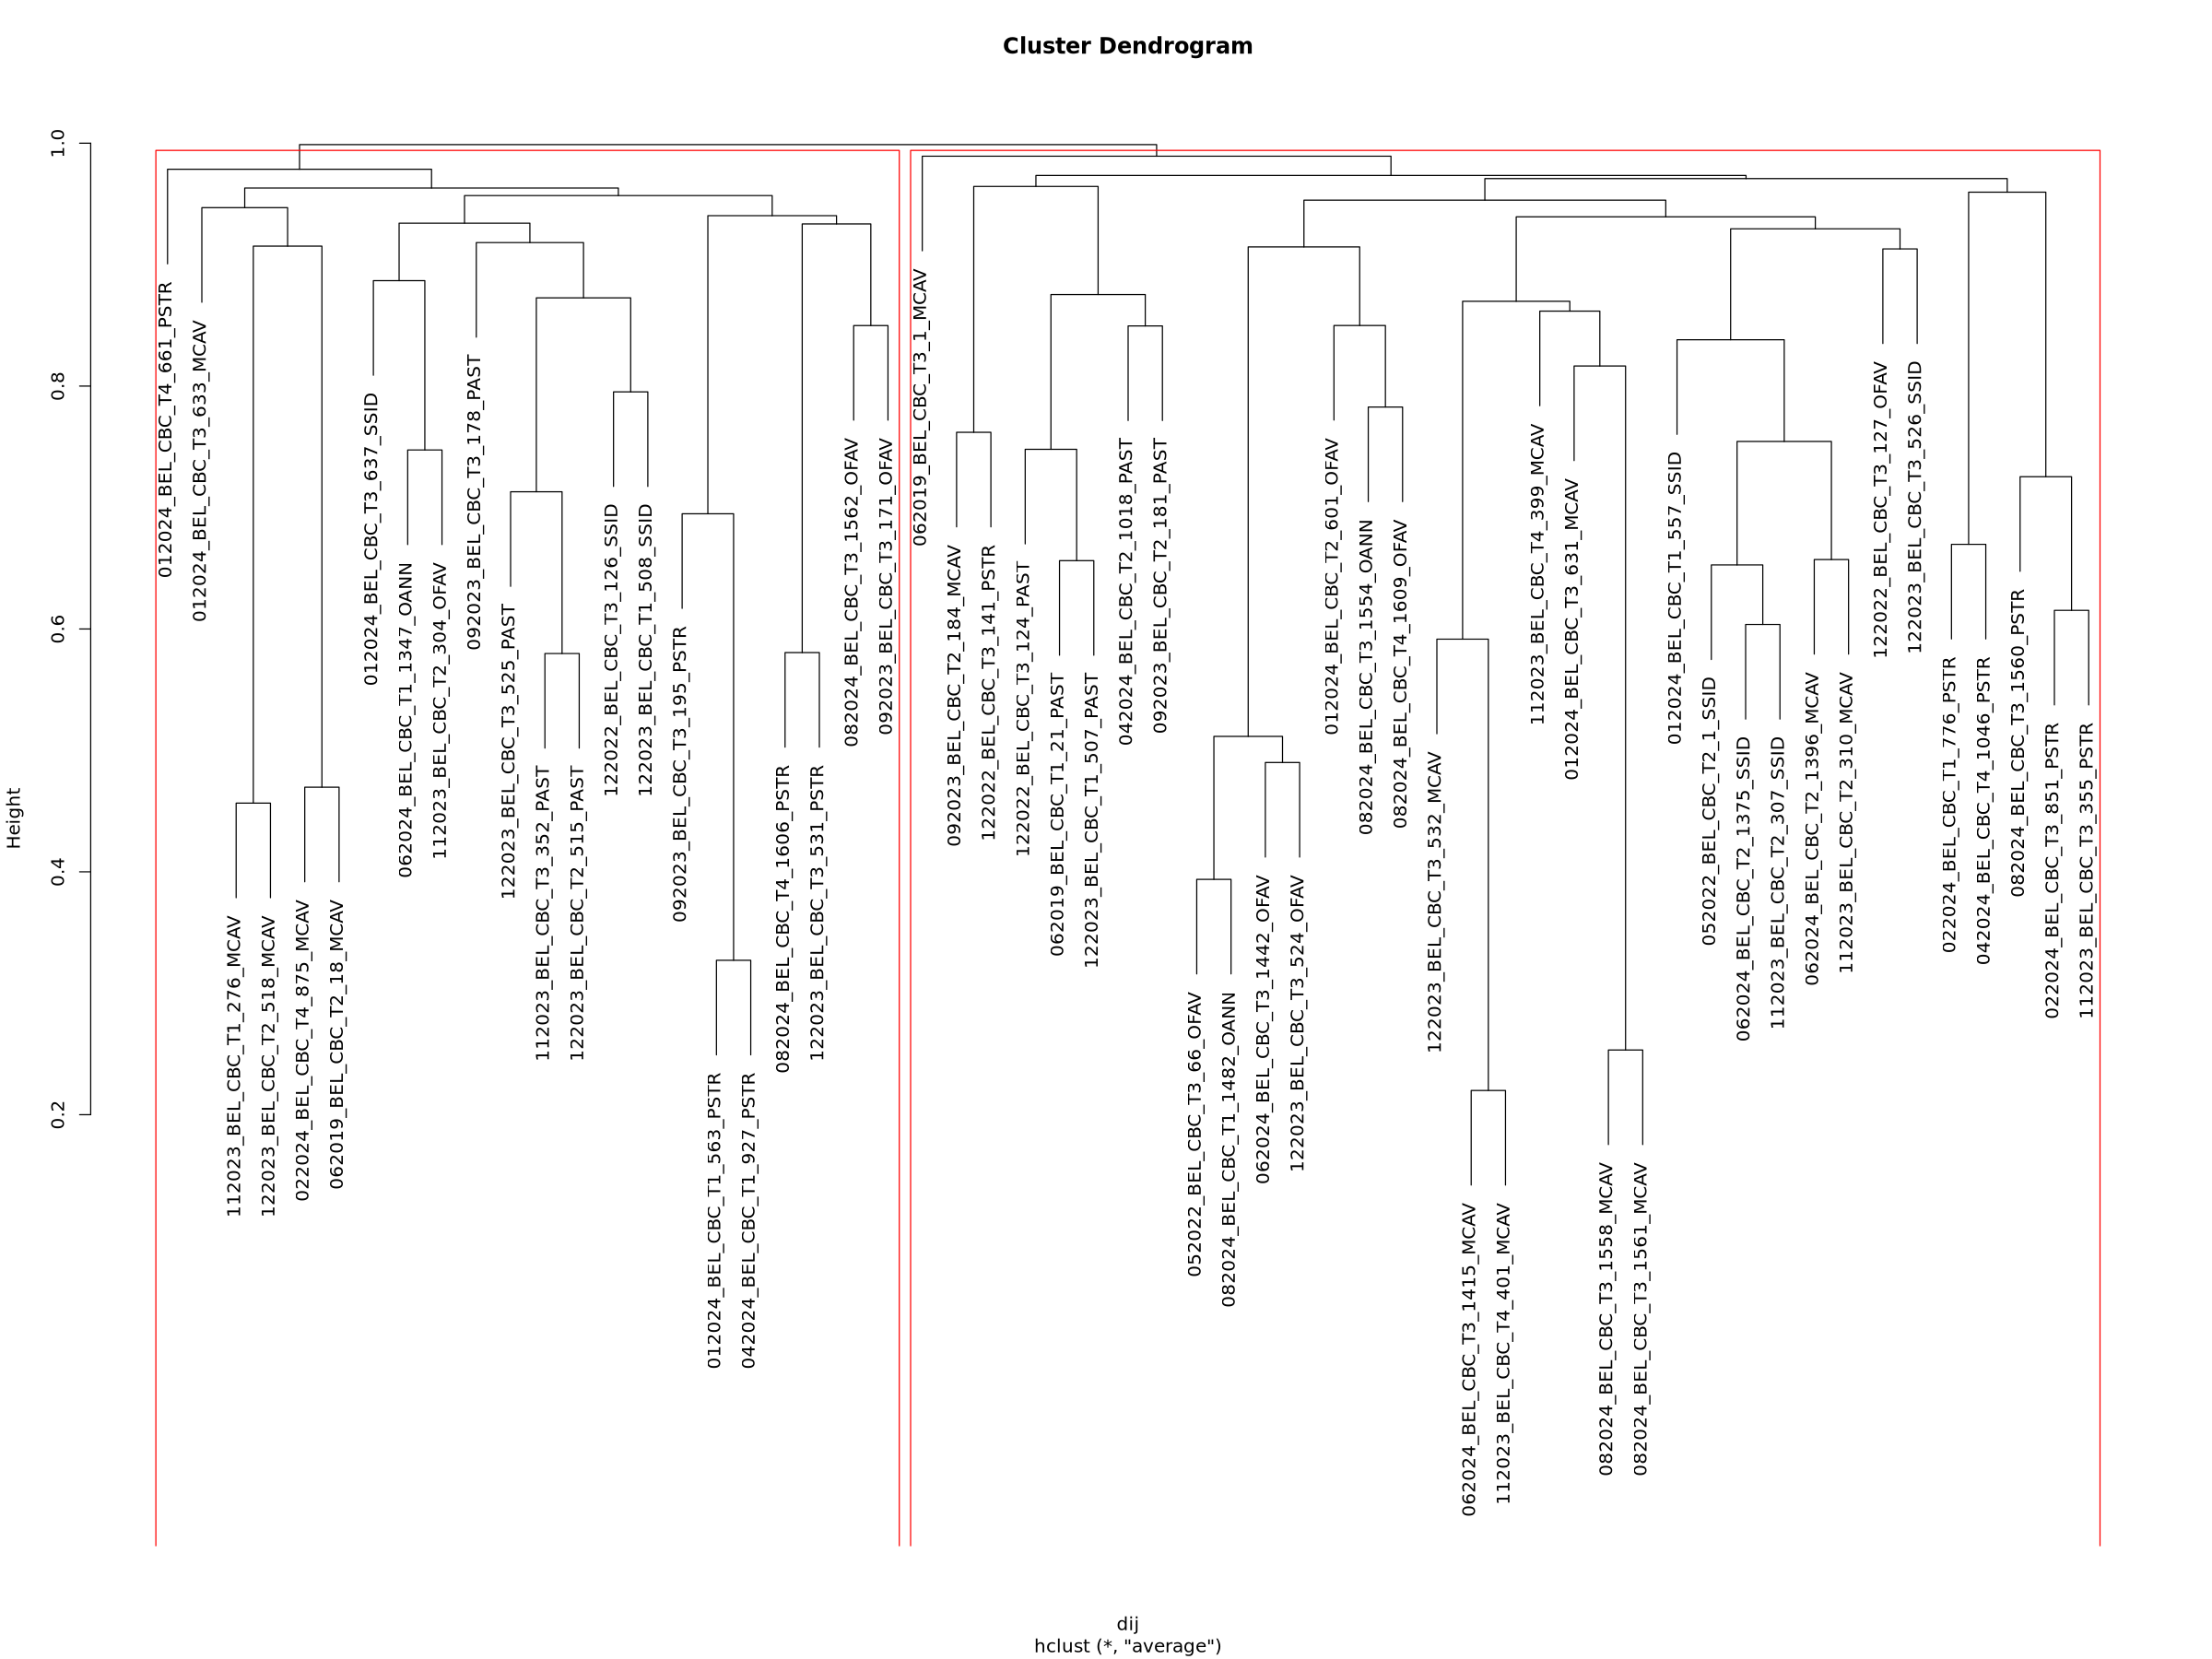

In [118]:
# visualizing the parent dendogram
plot(clu); rect.hclust(clu, k=2, border="red")

In [30]:
# Get indices of samples in each parent cluster
grp1_ids <- names(grp[grp == 1])
grp2_ids <- names(grp[grp == 2])

# Subset your original data
grp1_data <- otu_nochlo[grp1_ids, ]
grp2_data <- otu_nochlo[grp2_ids, ]

In [33]:
# now do clustering within each group
# Repeat the clustering within each group
dij1 <- vegdist(grp1_data)
clu1 <- hclust(dij1, method = "average")

dij2 <- vegdist(grp2_data)
clu2 <- hclust(dij2, method = "average")

# Cut into subclusters (you choose the depth, e.g., 2 or 3)
subgrp1 <- cutree(clu1, 3)
subgrp2 <- cutree(clu2, 3)

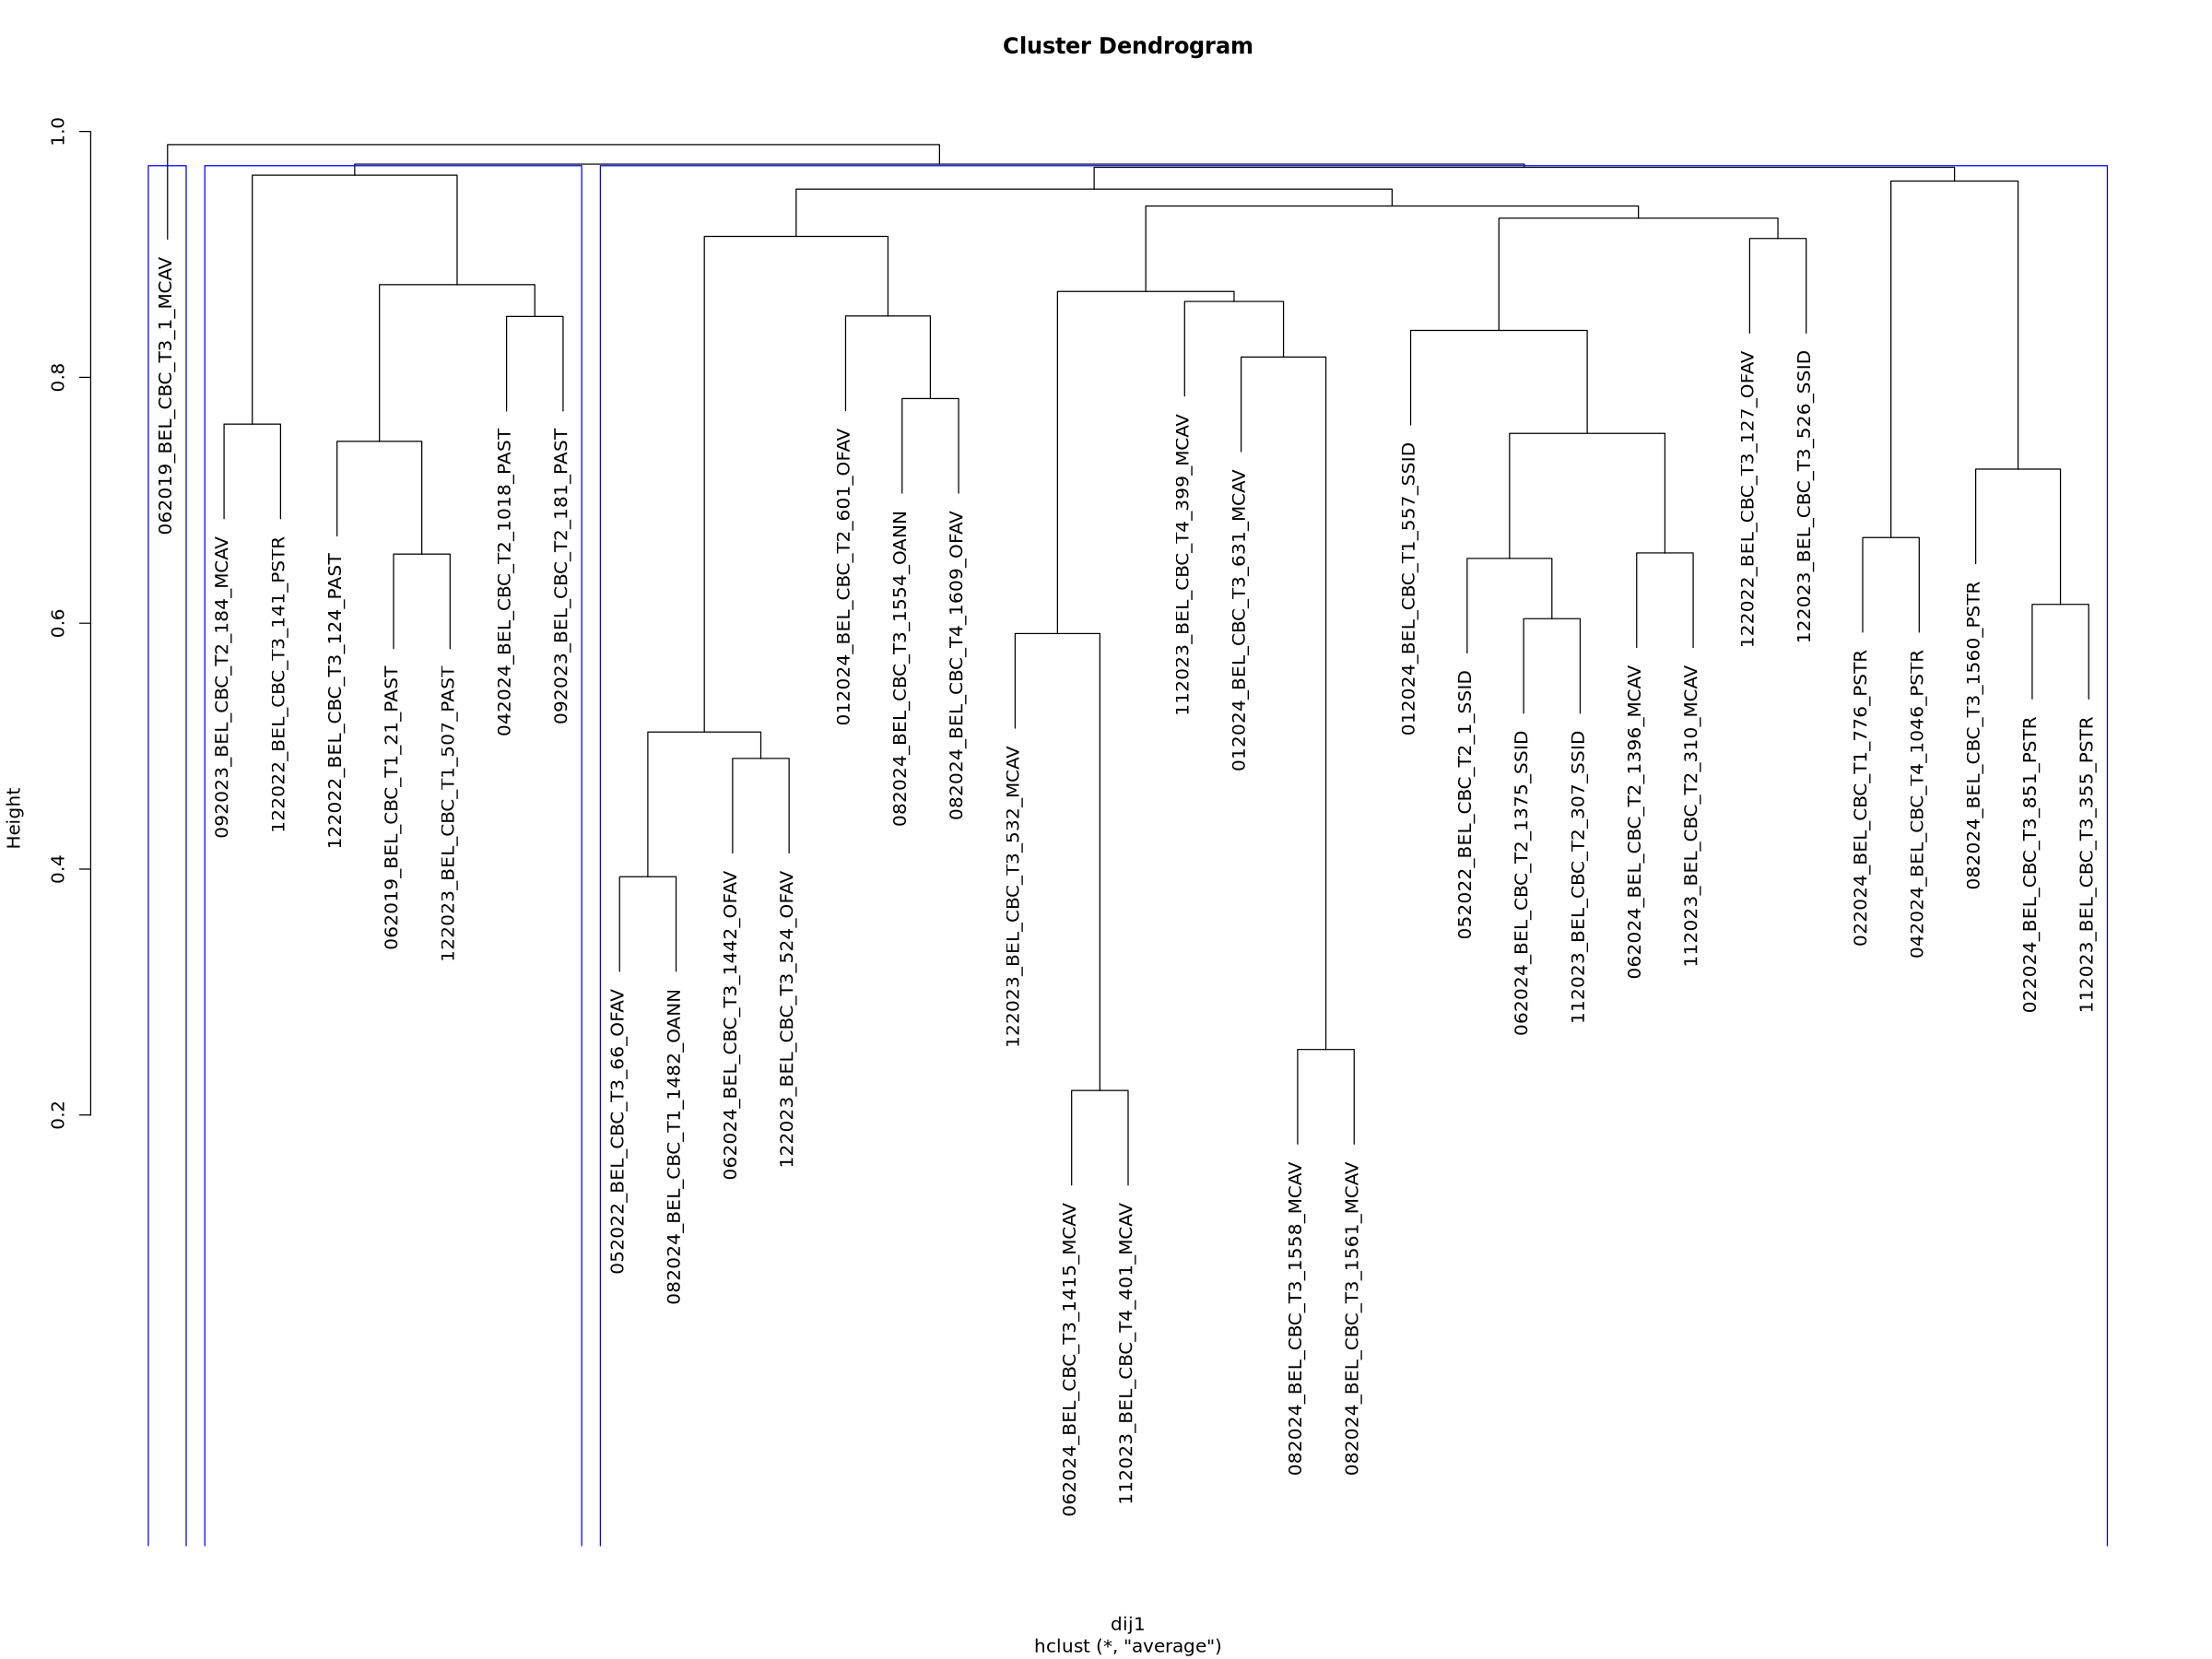

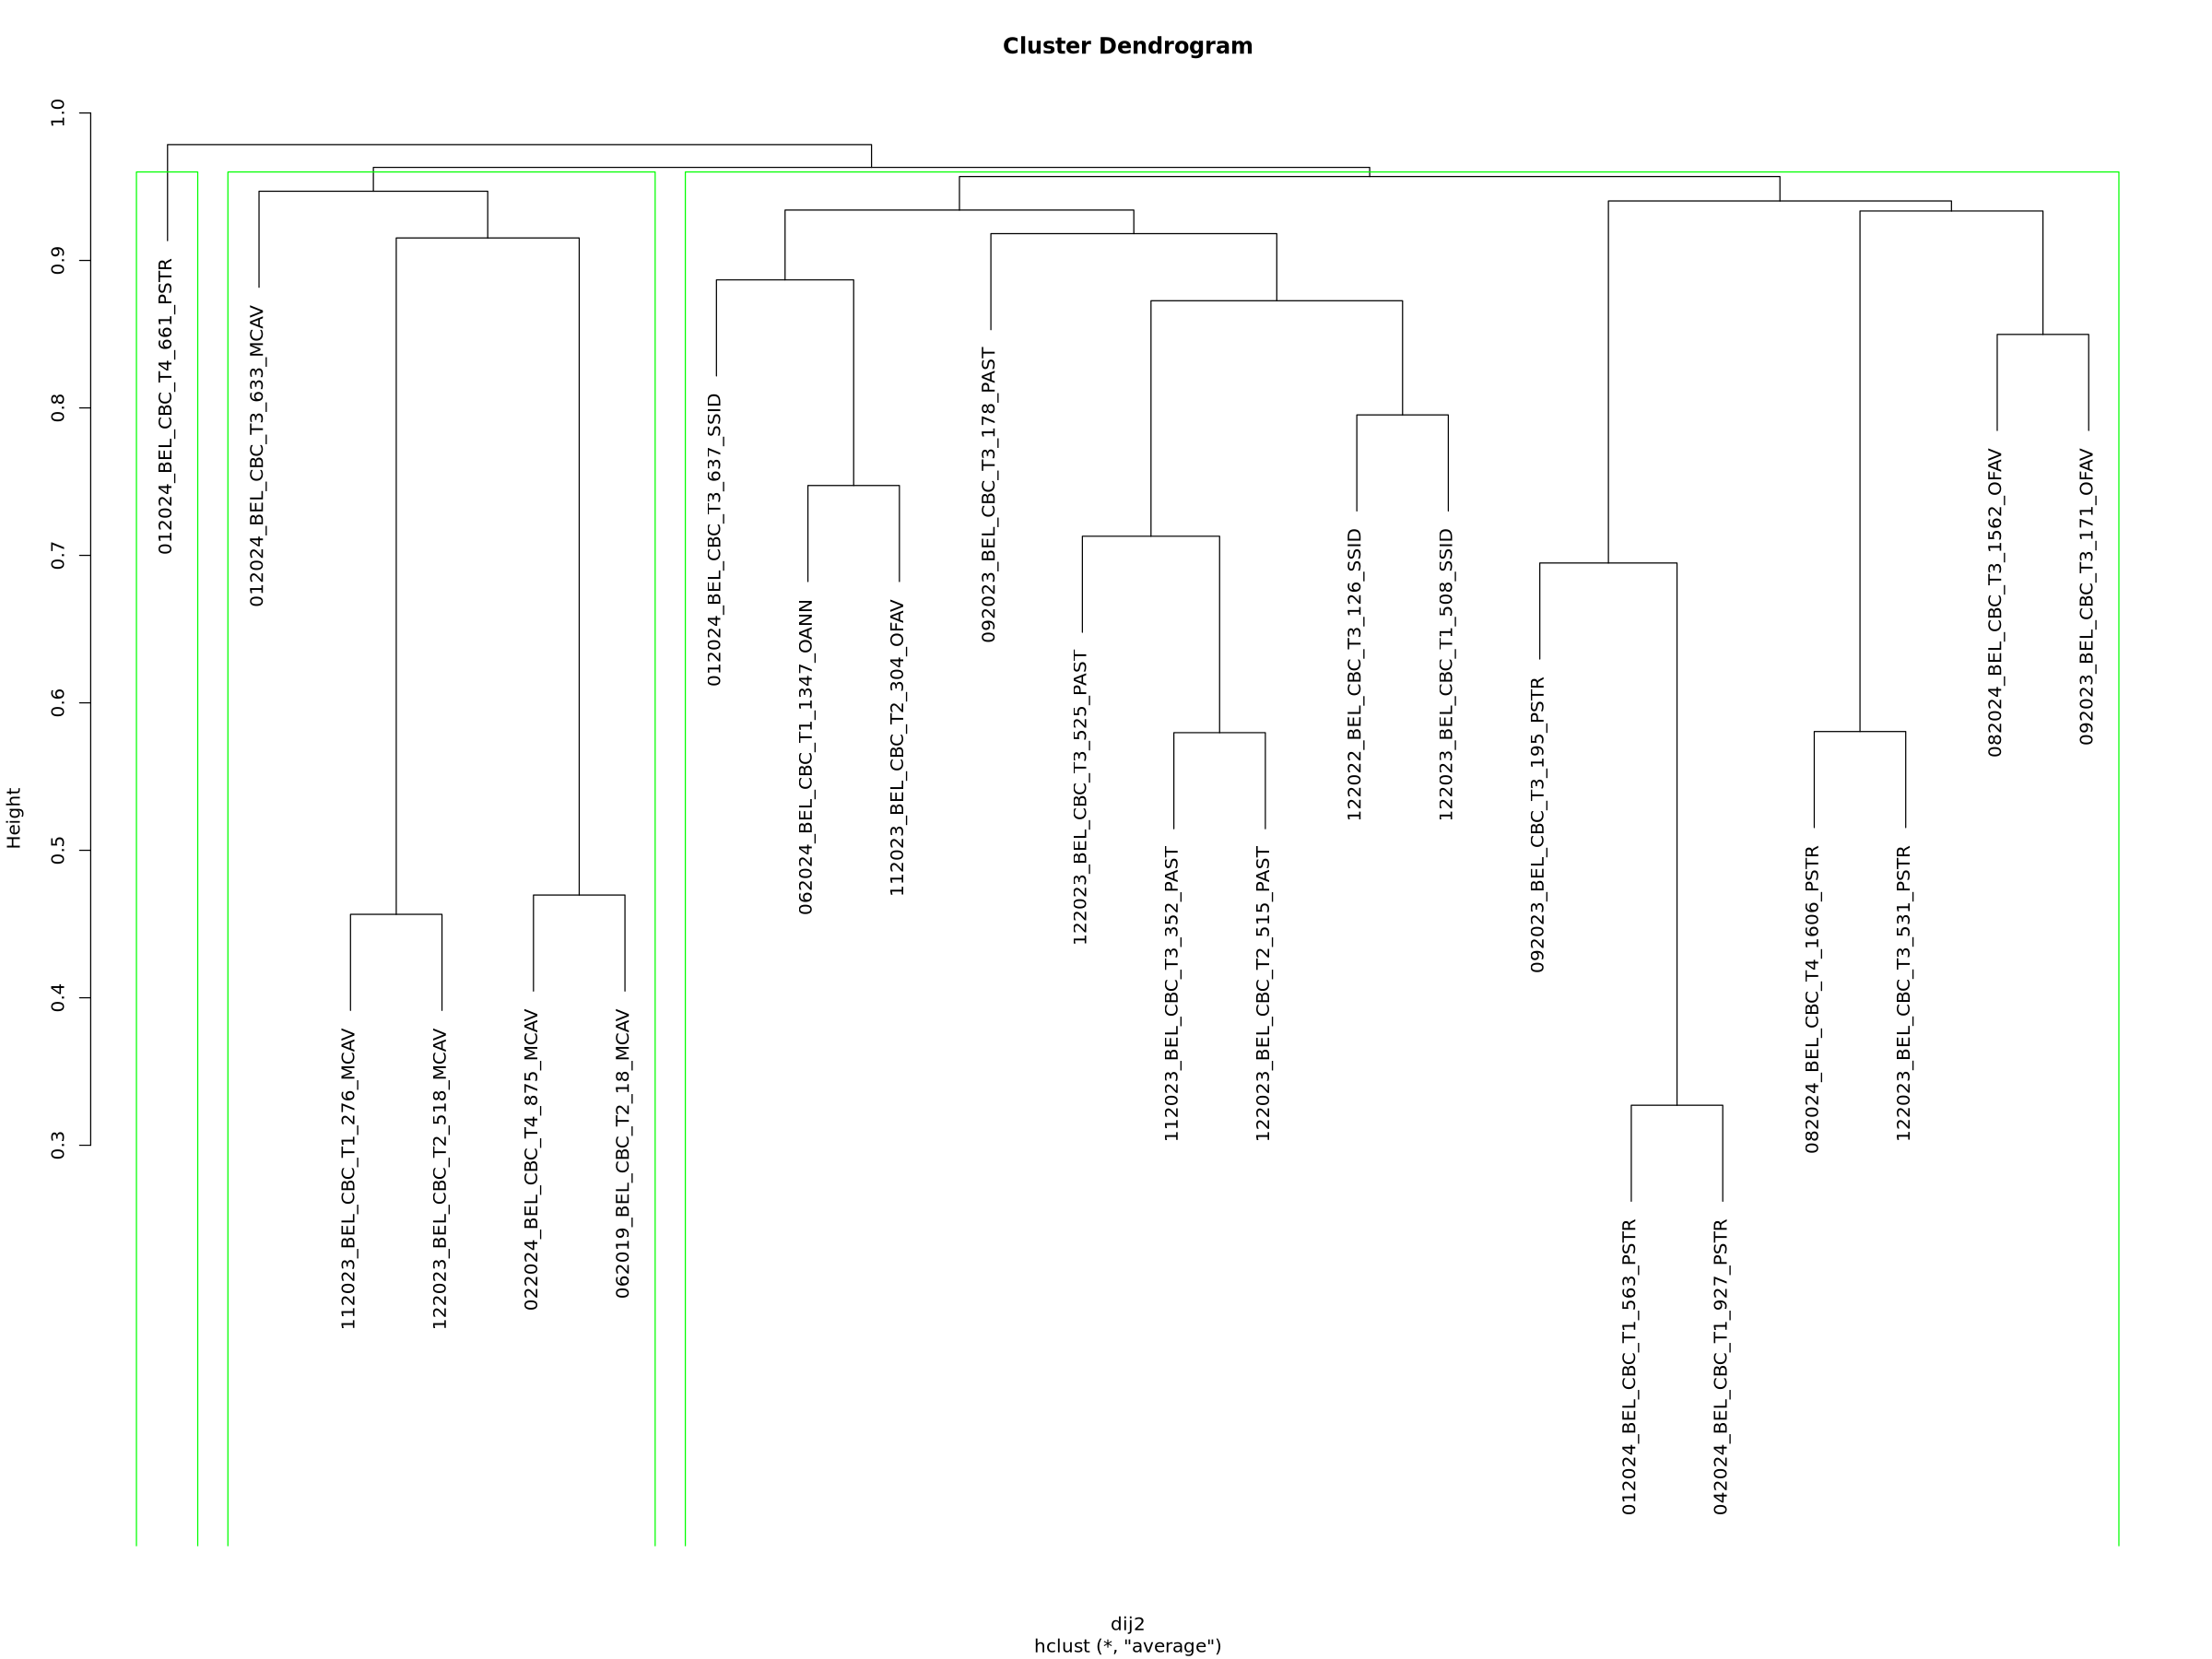

In [119]:
#plotting the sub groups
plot(clu1); rect.hclust(clu1, k = 3, border = "blue")
plot(clu2); rect.hclust(clu2, k = 3, border = "green")

In [120]:
#testing subgroups ecological relevance
adonis2(grp1_data ~ subgrp1, method = "bray")
adonis2(grp2_data ~ subgrp2, method = "bray")

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
subgrp1,1,0.8900767,0.05850014,2.050456,0.001
Residual,33,14.3248748,0.94149986,NA,NA
Total,34,15.2149515,1.00000000,NA,NA


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
subgrp2,1,0.7172353,0.07717841,1.672662,0.002
Residual,20,8.5759766,0.92282159,NA,NA
Total,21,9.2932119,1.00000000,NA,NA


# Now I am using those subgrouped dendograms to make an nmds plot that has subgroups visisble

In [121]:
# If you don`t provide a dissimilarity matrix, metaMDS automatically applies Bray-Curtis. So in our case, the results would have to be the same
nmds <- metaMDS(otu_nochlo, k = 2, trymax = 100, trace = F)

Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


In [122]:
# 1. Extract only the samples from nmds
nmds_points <- as.data.frame(scores(nmds, display = "sites"))
# 2. Add sample IDs
nmds_points$SampleID <- rownames(nmds_points)

In [123]:
# Convert to data frame for safe merging
parent_df <- data.frame(
  SampleID = names(grp),
  ParentCluster = factor(grp)
)
# Merge parent cluster info with NMDS points
nmds_points <- merge(nmds_points, parent_df, by = "SampleID")

In [124]:
#combine subgrp1 and subgrp2 into a single vector with clear labels ex 1.1, 2.1, 1.2, 2.2
subgrp_names <- c(
  setNames(paste0("1.", subgrp1), names(subgrp1)),
  setNames(paste0("2.", subgrp2), names(subgrp2))
)

# Create a data frame of subgroups for safe merging
subgroup_df <- data.frame(
  SampleID = names(subgrp_names),
  Subgroup = factor(subgrp_names)
)

In [125]:
# Merge subgroup info with NMDS points
nmds_points <- merge(nmds_points, subgroup_df, by = "SampleID")
#merge nmds points with sample metadata
# Make sure it has a SampleID column 
sample_clean$SampleID <- rownames(sample_clean) 
# Merge using new SampleID column
nmds_merged <- merge(nmds_points, sample_clean, by = "SampleID")

In [126]:
any(duplicated(colnames(nmds_merged)))
colnames(nmds_merged)[duplicated(colnames(nmds_merged))]
#replace teh duplicated version of subgroup that was created in meta data
nmds_merged <- nmds_merged[, !grepl("\\.y$", colnames(nmds_merged))]
colnames(nmds_merged) <- gsub("\\.x$", "", colnames(nmds_merged))  # Clean name
#check if an duplicates again?
any(duplicated(colnames(nmds_merged)))

[1] FALSE

character(0)

[1] FALSE

In [127]:
class(nmds_merged)
class(sample_clean)
head(sample_clean)
#removeing unnecessary columns from nmds_merged
nmds_merged$Subgroup.y.1 <- NULL 
nmds_merged$Subgroup.1 <- NULL 
nmds_merged$DateFormatted <- NULL
head(nmds_merged)

[1] "data.frame"

[1] "data.frame"

,Health_Status,colony,Date_16S,double_band,date_sampled,transect,species,MonthYear,SampleID
,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<fct>,<chr>
012024_BEL_CBC_T1_557_SSID,Healthy,1_3,3_4_2025,y,012024,T1,SSID,Jan 2024,012024_BEL_CBC_T1_557_SSID
012024_BEL_CBC_T1_563_PSTR,Healthy,1_12,3_6_2025,,012024,T1,PSTR,Jan 2024,012024_BEL_CBC_T1_563_PSTR
012024_BEL_CBC_T2_601_OFAV,Healthy,2_79,3_4_2025,,012024,T2,OFAV,Jan 2024,012024_BEL_CBC_T2_601_OFAV
012024_BEL_CBC_T3_631_MCAV,Healthy,3_21,3_4_2025,,012024,T3,MCAV,Jan 2024,012024_BEL_CBC_T3_631_MCAV
012024_BEL_CBC_T3_633_MCAV,Healthy,3_2,3_6_2025,,012024,T3,MCAV,Jan 2024,012024_BEL_CBC_T3_633_MCAV
012024_BEL_CBC_T3_637_SSID,Healthy,3_5,3_6_2025,,012024,T3,SSID,Jan 2024,012024_BEL_CBC_T3_637_SSID


,SampleID,NMDS1,NMDS2,ParentCluster,Subgroup,Health_Status,colony,Date_16S,double_band,date_sampled,transect,species,MonthYear
,<chr>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<fct>
1,012024_BEL_CBC_T1_557_SSID,-0.2806469,0.035390974,1,1.1,Healthy,1_3,3_4_2025,y,012024,T1,SSID,Jan 2024
2,012024_BEL_CBC_T1_563_PSTR,0.4893316,-0.094485411,2,2.1,Healthy,1_12,3_6_2025,,012024,T1,PSTR,Jan 2024
3,012024_BEL_CBC_T2_601_OFAV,-0.2862360,-0.032964993,1,1.1,Healthy,2_79,3_4_2025,,012024,T2,OFAV,Jan 2024
4,012024_BEL_CBC_T3_631_MCAV,-0.2561180,-0.100294845,1,1.1,Healthy,3_21,3_4_2025,,012024,T3,MCAV,Jan 2024
5,012024_BEL_CBC_T3_633_MCAV,0.3537174,-0.003074378,2,2.2,Healthy,3_2,3_6_2025,,012024,T3,MCAV,Jan 2024
6,012024_BEL_CBC_T3_637_SSID,0.4945974,-0.058111642,2,2.1,Healthy,3_5,3_6_2025,,012024,T3,SSID,Jan 2024


Too few points to calculate an ellipse
Too few points to calculate an ellipse


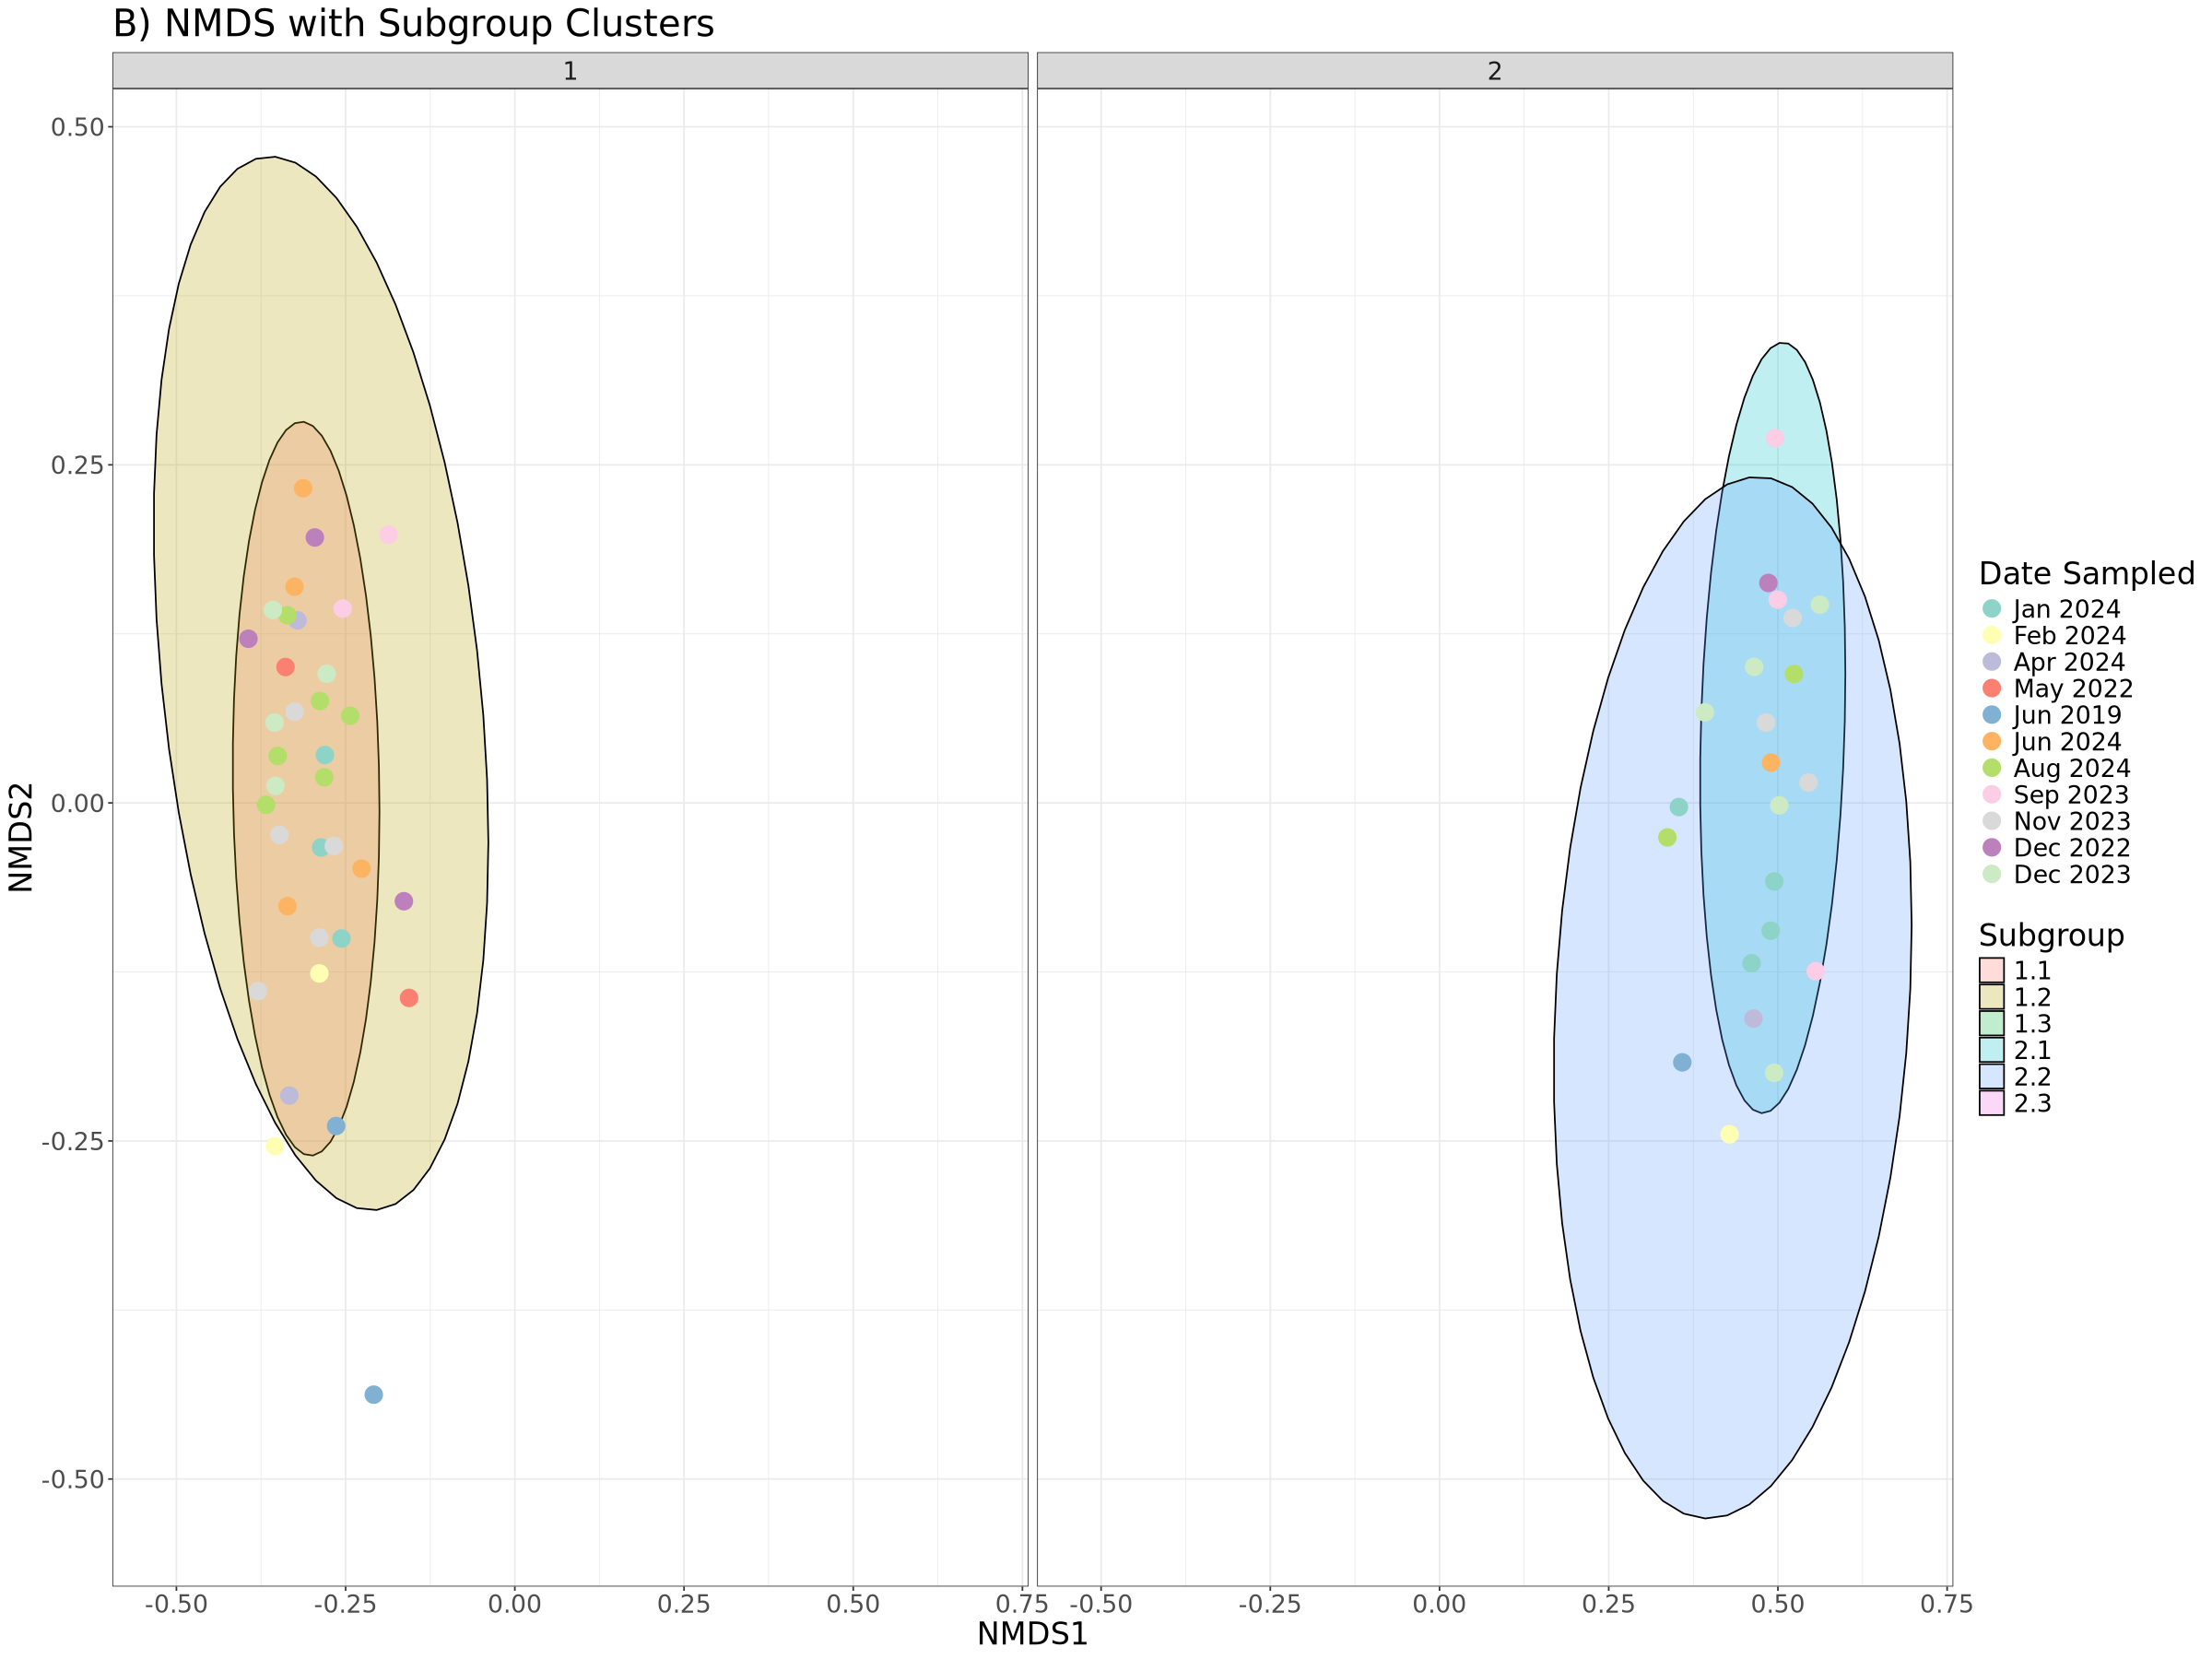

In [128]:
#plot adapted from julia's github
# plot
nmds_plot <- ggplot(nmds_merged, aes(NMDS1, NMDS2, col = MonthYear)) + 
scale_color_brewer(palette = "Set3") +
#axis labels
   stat_ellipse(aes(group = Subgroup, fill = Subgroup), 
               geom = "polygon", alpha = 0.25, color = "black", level = 0.95) +
labs(color = "Date Sampled", title = 'B) NMDS with Subgroup Clusters') +
geom_point(size = 5, alpha = 1) +
facet_wrap(~ ParentCluster) +
guides(col = guide_legend(order = 1),
          shape = guide_legend(order = 2)) +
 theme(text = element_text(size = 20)) 
nmds_plot

# removing date_16S from sample data doesn't change the overall clustering
### actually hierarchical clustering is not ideal for the level of nesting I have going on
Hierarchies rely on a tree-like structure called a dendrogram. In an agglomerative (bottom-up) approach, clusters are successively merged, and a data point remains within the lineage of the cluster it first joins.
basically if two species are idependently in different groups, dendogram doesn't know what to do with it

# hierarchical analysis to answer why are some species clustering more than others?
and how to I prove mathematically that they are clustering differently


## using vegan to try to plot what I have above with more control over colors

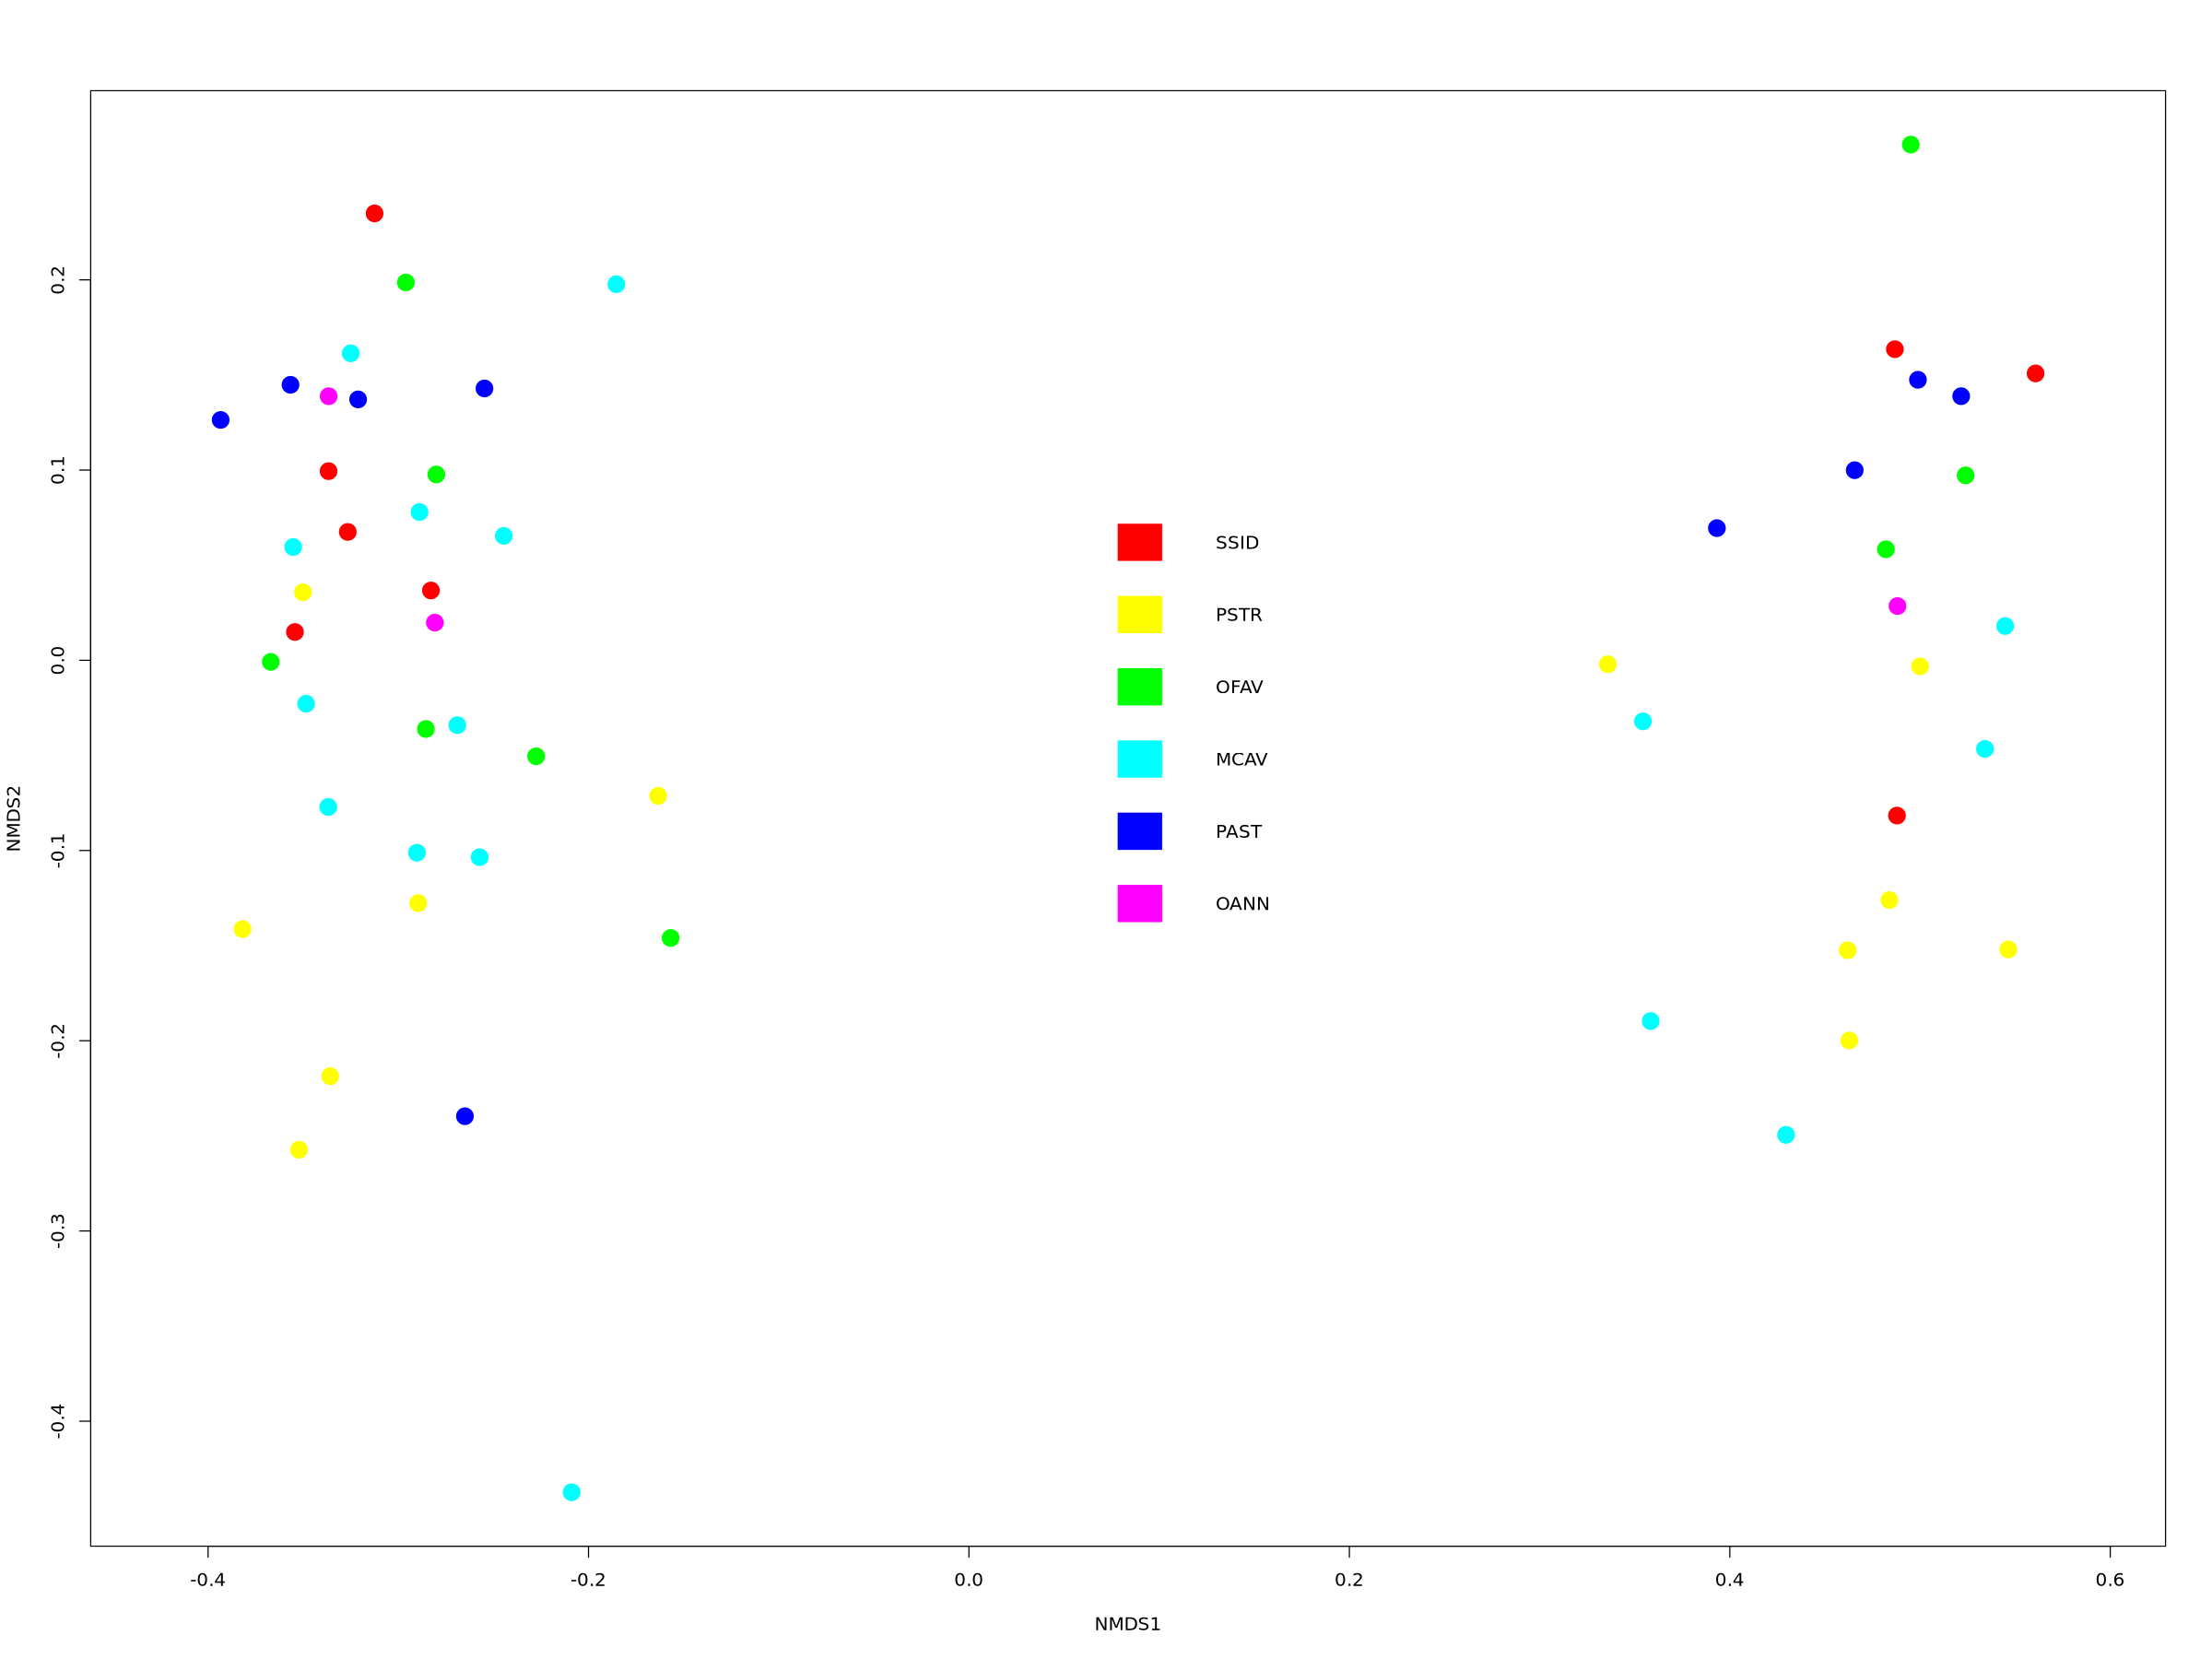

In [136]:
#plot ellipsoid hulls hierarchal clustering Date_16S and species
disp <- "sites" 
scl <- "symmetric" 
# Base NMDS plot (no points yet)
plot(NMDS_nochlo, type = "n", display = disp)
#add larger clusters Date_16S
ordiellipse(NMDS_nochlo,
            groups = sample_nochlo$species_clean,
            kind = "ehull",
            col = col_spec,
            lwd = 3,
            lty = 2)
# Ellipses by species
ordiellipse(NMDS_nochlo, groups = sample_nochlo$species_clean,
            draw = "polygon",
            col = col_spec,
            alpha = 80,
            lwd = 2)
# Optional spiders
ordispider(NMDS_nochlo, groups = sample_nochlo$species_clean,
           col = col_spec,
           label = FALSE)

points(NMDS_nochlo, display = "sites", 
       pch = 21, 
       cex = 2, 
       col = group_colors, 
       bg = group_colors)

# Legend by species
legend(0.05,0.1, legend = names(col_spec),
       fill = col_spec,
       border = col_spec,
       bty = "n")
     

# in the future I may want to subset by things in the sample_norm

ps_MCAV = subset_samples(DE, species%in%c("MCAV"))
ps_SSID = subset_samples(DE, species%in%c("SSID"))